## Speeches Scraping

In [3]:
import os
from os import walk
from bs4 import BeautifulSoup
import requests

### Files structures
The folders exist each named by the name of some of the american presidents
inside each folder, there is an html file "initial.txt" scraped from millercenter.org
containing links for all the speeches of each corresponding president

In [4]:
# parent folder
path = 'presidents-speeches/'

# will contain all the data "president name" : ["speeches links"]
presidential_dictionary_list = []
for (root, dirs, files) in walk(path):
    # go through child folders, skip the first parent folder
    if len(dirs) == 1:
        president_speahces_dict = {}
        # get the name of the president from the file path
        president_name = root.split("/")[1]
        president_speahces_dict['president_name'] = president_name
        speches_links = []
        file_path = "{}/{}".format(root,files[0])
        # open the "initial.txt" file for each president
        with open(file_path) as html_links_file:
            soup = BeautifulSoup(html_links_file)
            for link in soup.findAll('a'):
                # extract the speeches links from the <a> tags
                speches_links.append(link.get('href'))
        president_speahces_dict['speeches_links'] = speches_links
        presidential_dictionary_list.append(president_speahces_dict)

In [5]:
presidential_dictionary_list

[{'president_name': 'Andrew Jackson',
  'speeches_links': ['/the-presidency/presidential-speeches/march-4-1837-farewell-address',
   '/the-presidency/presidential-speeches/december-21-1836-statement-independence-texas',
   '/the-presidency/presidential-speeches/december-5-1836-eighth-annual-message-congress',
   '/the-presidency/presidential-speeches/december-7-1835-seventh-annual-address-congress',
   '/the-presidency/presidential-speeches/december-1-1834-sixth-annual-message-congress',
   '/the-presidency/presidential-speeches/april-21-1834-addendum-protest-senate-censure',
   '/the-presidency/presidential-speeches/april-15-1834-protest-senate-censure',
   '/the-presidency/presidential-speeches/december-12-1833-message-constitutional-rights-and',
   '/the-presidency/presidential-speeches/december-3-1833-fifth-annual-message-congress',
   '/the-presidency/presidential-speeches/september-18-1833-message-regarding-bank-united-states',
   '/the-presidency/presidential-speeches/march-4-18

### Fetch speeches from the site
now that we have the links of the speeches, we can fetch them and extract the content
we will save them in files titled by date__title, corresponding to every president

In [6]:
# format speech titles to be appropriate for usage as file names
import re
def file_name_format(text):
    return re.sub('[^A-Za-z0-9\-\_]+', '', text)

In [7]:
for presidential_dictionary in presidential_dictionary_list:
    print("extracting speeches of president {}".format(presidential_dictionary['president_name']))
    speech_counter = 1
    total_speeches = len(presidential_dictionary['speeches_links'])
    for speech_link in presidential_dictionary['speeches_links']:
        try:
            resp = requests.get("https://millercenter.org/{}".format(speech_link))
        except requests.exceptions.RequestException as e:
            print(e)
        print("speech {}/{}".format(speech_counter,total_speeches))
        speech_counter+=1
        if resp.status_code == 200:
            soup = BeautifulSoup(resp._content)
            president_speech = ''
            # the speech is present inside a <div> with class "view-transcript", as a set of <p> tags
            for transcripts in soup.find_all('div', { "class" : "view-transcript"}): # there is only one view-transcript per page
                ps = transcripts.find_all('p')
                president_speech = ' '.join([p.text for p in ps])
            # get the title and date of every speech, and name the file accordingly
            for title in soup.find_all('h2', { "class" : "presidential-speeches--title"}):
                ttl = title.find('span').text
                date_speech_title = ttl.split(":")
                date = date_speech_title[0].strip()
                speech_title = date_speech_title[1].strip()
            with open(path+presidential_dictionary['president_name']+"/speeches/"+date+"__"+file_name_format(speech_title)+".txt","w+") as out_file:
                out_file.write(str(president_speech.encode('utf8')))

extracting speeches of president Andrew Jackson
speech 1/26
speech 2/26
speech 3/26
speech 4/26
speech 5/26
speech 6/26
speech 7/26
speech 8/26
speech 9/26
speech 10/26
speech 11/26
speech 12/26
speech 13/26
speech 14/26
speech 15/26
speech 16/26
speech 17/26
speech 18/26
speech 19/26
speech 20/26
speech 21/26
speech 22/26
speech 23/26
speech 24/26
speech 25/26
speech 26/26
extracting speeches of president Barack Obama
speech 1/50
speech 2/50
speech 3/50
speech 4/50
speech 5/50
speech 6/50
speech 7/50
speech 8/50
speech 9/50
speech 10/50
speech 11/50
speech 12/50
speech 13/50
speech 14/50
speech 15/50
speech 16/50
speech 17/50
speech 18/50
speech 19/50
speech 20/50
speech 21/50
speech 22/50
speech 23/50
speech 24/50
speech 25/50
speech 26/50
speech 27/50
speech 28/50
speech 29/50
speech 30/50
speech 31/50
speech 32/50
speech 33/50
speech 34/50
speech 35/50
speech 36/50
speech 37/50
speech 38/50
speech 39/50
speech 40/50
speech 41/50
speech 42/50
speech 43/50
speech 44/50
speech 45/50
s

For coding purposes we will be loading and storing the presidential speeches in a chronogical order

In [8]:
import glob
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt 

## Lists of presidents sorted, and list of the number of speeches of presidents sorted 
pr_sorted= ['George Washington']*21+['Thomas Jefferson']*24 +['Andrew Jackson']*26+['Franklin D. Roosevelt']*49 + ['Richard M. Nixon']*23 +['Ronald Reagan']*59+ ['George H. W. Bush']*23 + ['Bill Clinton']*39 + ['George W. Bush']*39 + ['Barack Obama']*50 + ['Donald Trump']*22
presidents_sorted = ["George Washington","Thomas Jefferson","Andrew Jackson","Franklin D. Roosevelt",'Richard M. Nixon',"Ronald Reagan","George H. W. Bush","Bill Clinton","George W. Bush","Barack Obama",'Donald Trump']

#getting paths for speeches of presidents sorted by time and storing in dictionnary 
speeches_path=[]
for i in presidents_sorted : 
    speeches_path += list(os.listdir(os.path.join(os.getcwd(), "presidents-speeches/" + str(i) + "/speeches")))

dict_ = dict(dict(zip(speeches_path,pr_sorted)))
array=np.array([[key,val] for (key,val) in dict_.items()])
df = pd.DataFrame(array,columns=["speech","name"])


Getting dates of different speeches and sorting them chronogically

In [9]:
date = []

for i in range(len(df)):
    date.append(df["speech"][i].split("_")[0])
    
## Sorting dates 

from datetime import datetime
date.sort(key=lambda date: datetime.strptime(date, "%B %d, %Y"))

In [10]:
## Loading speeches by sorted dates

file_list_sorted = []
corpus_sorted = []
mini_corpus_sorted = []

for name in presidents_sorted : 
    for j in date:
        file_list_sorted += glob.glob(os.path.join(os.getcwd(), "presidents-speeches/" + str(name) + "/speeches/"+ j +"*.txt"))
    mini_corpus_sorted = [name]

for file in file_list_sorted:
    mini_corpus_sorted=([open(file).read()])
    corpus_sorted.append(mini_corpus_sorted)   

In [14]:
# Putting speeches sorted by date in Dataframe

list__ = []

for i in corpus_sorted:
    list__.append(str(i))
    
df["speech"]= list__[:374]

In [15]:
df["date of speech"] = date
df

,speech,name,date of speech
0,['b\'Fellow Citizens of the Senate and the Hou...,George Washington,"April 30, 1789"
1,['b\'Whereas it is the duty of all Nations to ...,George Washington,"October 3, 1789"
2,"[""b'Fellow Citizens of the Senate and House of...",George Washington,"January 8, 1790"
3,"[""b' Fellow citizens of the Senate and House o...",George Washington,"December 8, 1790"
4,"['b\' I the President of the United States, by...",George Washington,"December 29, 1790"
...,...,...,...
369,"[""b'Madam Speaker, Mr. Vice President, Members...",Donald Trump,"February 15, 2019"
370,"[""b'THE PRESIDENT:\\xc2\\xa0 Thank you very mu...",Donald Trump,"September 24, 2019"
371,"[""b'PRESIDENT TRUMP:\\xc2\\xa0 Thank you very ...",Donald Trump,"October 27, 2019"
372,"[""b'Last night, the United States brought the ...",Donald Trump,"January 3, 2020"


## Preprocessing Data

Cleaning Data with regex expressions

In [16]:

df["speech"].replace(to_replace="(\\\\r|\\\\xe2|\\\\x80|\\\\xc2|\\\\xa0|\\\\x99|\\\\x94|\\\\n|'b\\\"|\\\\)",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="'b\"/",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="\\/",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="'b\'",value="",regex = True, inplace = True)
df["speech"].replace(to_replace="xc2xa0'", value = "", regex = True, inplace= True)
df["speech"].replace(to_replace="   ", value = " ", regex = True, inplace= True)


 Stemming data, removing stopwords and saving it in a new column

In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stemmer = PorterStemmer()
def cleaning_text(message) :
    words = [stemmer.stem(word) for word in str(message).split() if word.lower() not in stopwords.words("english")]
    return " ".join(words)
df["processed_speech_stemmed"] = df["speech"].apply(cleaning_text)

In [18]:
df

,speech,name,date of speech,processed_speech_stemmed
0,[Fellow Citizens of the Senate and the House o...,George Washington,"April 30, 1789",[fellow citizen senat hous representatives: am...
1,[Whereas it is the duty of all Nations to ackn...,George Washington,"October 3, 1789",[wherea duti nation acknowledg provid almighti...
2,"[""b'Fellow Citizens of the Senate and House of...",George Washington,"January 8, 1790","[""b'fellow citizen senat hous representatives:..."
3,"[""b' Fellow citizens of the Senate and House o...",George Washington,"December 8, 1790","[""b' fellow citizen senat hous representatives..."
4,"[ I the President of the United States, by my ...",George Washington,"December 29, 1790","[ presid unit states, mouth, written speech si..."
...,...,...,...,...
369,"[""b'Madam Speaker, Mr. Vice President, Members...",Donald Trump,"February 15, 2019","[""b'madam speaker, mr. vice president, member ..."
370,"[""b'THE PRESIDENT: Thank you very much, everyb...",Donald Trump,"September 24, 2019","[""b'the president: thank much, everybody. begi..."
371,"[""b'PRESIDENT TRUMP: Thank you very much. Mr. ...",Donald Trump,"October 27, 2019","[""b'presid trump: thank much. mr. president, m..."
372,"[""b'Last night, the United States brought the ...",Donald Trump,"January 3, 2020","[""b'last night, unit state brought world numbe..."


 ## Train Test Splitting

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Shuffling data so the model won't be biased
train_x, test_x, train_y, test_y = train_test_split(df['processed_speech_stemmed'],df['name'], test_size = 0.2, shuffle = True)



## TFIDF vectorizing


In [20]:
tfidf_vect= TfidfVectorizer()
tfidf_vect.fit(df['processed_speech_stemmed'])
train_x_tfidf = tfidf_vect.transform(train_x)
test_x_tfidf = tfidf_vect.transform(test_x)

## Prediction Models 


#### Naive Bayes Classifier

In [21]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score
naive_model= naive_bayes.MultinomialNB(alpha = 0.00001)
naive_model.fit(train_x_tfidf,train_y)
predictionNB = naive_model.predict(test_x_tfidf)


In [22]:
print("Accuracy score of the Multionomal NB : is ", accuracy_score(test_y, predictionNB))

Accuracy score of the Multionomal NB : is  0.6933333333333334


In [23]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt    

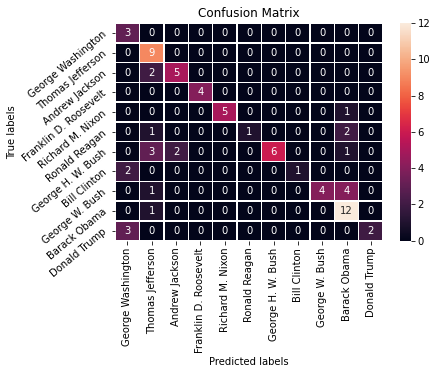

In [24]:
#Confusion matrix
cm_NB = confusion_matrix(test_y, predictionNB)
ax= plt.subplot()
sns.heatmap(cm_NB, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 40);

#### Support Vector Classification model

In [25]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_x_tfidf,train_y)
predictionsvc = svc_model.predict(test_x_tfidf)

In [26]:
print("Accuracy score of the Support Vector Classifier is ", accuracy_score(test_y, predictionsvc))

Accuracy score of the Support Vector Classifier is  0.5866666666666667


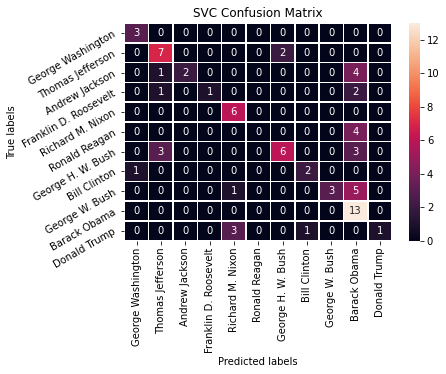

In [27]:
#Confusion matrix
cm_SVC = confusion_matrix(test_y, predictionsvc)
ax= plt.subplot()
sns.heatmap(cm_SVC, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('SVC Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 30);

#### KNeighbors Classifier

In [28]:

from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=5, weights='distance',algorithm='auto')
knc_model.fit(train_x_tfidf,train_y)
predictionknc = knc_model.predict(test_x_tfidf)

In [29]:
print("Accuracy score of the KNeighbors Classifier is", accuracy_score(test_y, predictionknc))

Accuracy score of the KNeighbors Classifier is 0.68


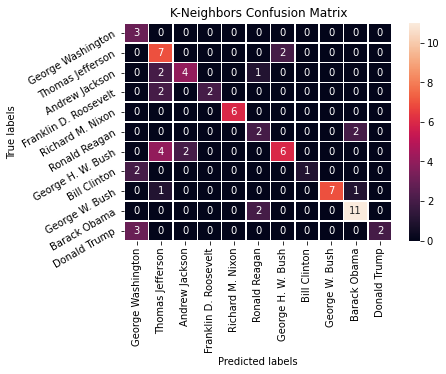

In [30]:
#Confusion matrix
cm_KN = confusion_matrix(test_y, predictionknc)
ax= plt.subplot()
sns.heatmap(cm_KN, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('K-Neighbors Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 30);

#### Stochastic gradient descent classifier

In [31]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(train_x_tfidf,train_y)
predictionsgd = sgd_model.predict(test_x_tfidf)

In [32]:
print("Accuracy score of the SGD Classifier is ", accuracy_score(test_y, predictionsgd))

Accuracy score of the SGD Classifier is  0.7866666666666666


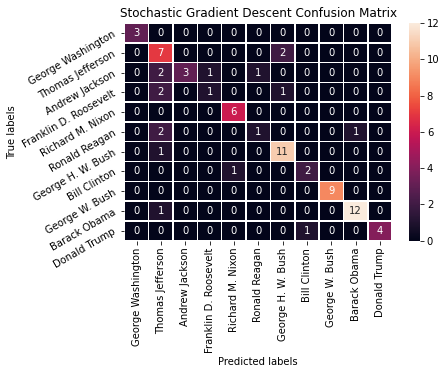

In [33]:
#Confusion matrix
cm_SGD = confusion_matrix(test_y, predictionsgd)
ax= plt.subplot()
sns.heatmap(cm_SGD, annot=True, ax = ax,linewidths=.5)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Stochastic Gradient Descent Confusion Matrix'); 
ax.xaxis.set_ticklabels(presidents_sorted, rotation = 90); ax.yaxis.set_ticklabels(presidents_sorted,rotation = 30);

## Part B : Sentiment Analysis

Vader Sentiment Analysis

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
l = []
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df["processed_speech_stemmed"]]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df["processed_speech_stemmed"]]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df["processed_speech_stemmed"]]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df["processed_speech_stemmed"]]

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate

## Counting the number of negative speeches vs the number of positive speeches for every president

In order to give for each speech an overall sentiment score. The neutrality percentage of the speech should be taken into account in order to avoid bias. To do so, we decided to normalize the postive & negative scores in a way that the neutral score wouldn't affect the comparison of every speech's sentiment. Therefore, we chose to normalize as follows: 
neg = neg/(neg+pos)
pos = pos/(neg+pos)

In [35]:
df["negative scaled"] = df["neg"]/(df["neg"]+df["pos"])
df["positive scaled"] = df["pos"]/(df["neg"]+df["pos"])
df["overall sentiment"] = df["positive scaled"] - df["negative scaled"]

In [36]:
def speeches_sentiment_count(names) :
    affectionate = []
    dreadful = []
    for i in names:
        num_pos = df.loc[(df["name"] == i) & (df["overall sentiment"]>0)]
        num_neg = df.loc[(df["name"] == i) & (df["overall sentiment"]<0)]
        num_pos = num_pos.shape[0]
        num_neg = num_neg.shape[0]
        print(" The number of positive and negative speeches of ", i, " are respectively : ", num_pos , num_neg)
        affectionate.append(num_pos)
        dreadful.append(num_neg)
    return(affectionate, dreadful)
pos, neg = speeches_sentiment_count(presidents_sorted)

 The number of positive and negative speeches of  George Washington  are respectively :  19 1
 The number of positive and negative speeches of  Thomas Jefferson  are respectively :  23 0
 The number of positive and negative speeches of  Andrew Jackson  are respectively :  26 0
 The number of positive and negative speeches of  Franklin D. Roosevelt  are respectively :  37 11
 The number of positive and negative speeches of  Richard M. Nixon  are respectively :  20 3
 The number of positive and negative speeches of  Ronald Reagan  are respectively :  56 3
 The number of positive and negative speeches of  George H. W. Bush  are respectively :  21 2
 The number of positive and negative speeches of  Bill Clinton  are respectively :  39 0
 The number of positive and negative speeches of  George W. Bush  are respectively :  32 7
 The number of positive and negative speeches of  Barack Obama  are respectively :  47 3
 The number of positive and negative speeches of  Donald Trump  are respectiv

<AxesSubplot:xlabel='name'>

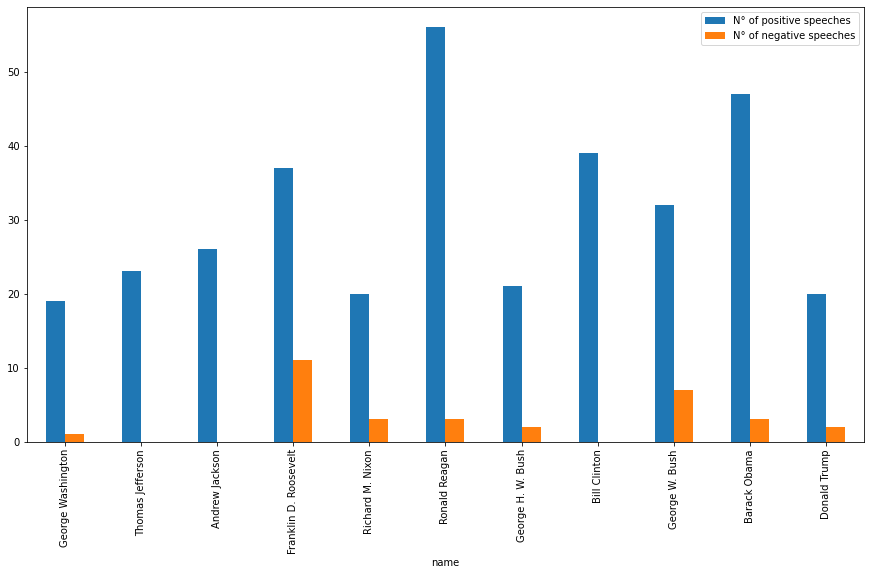

In [41]:
count_list = [presidents_sorted, pos, neg]

 

count_dataframe = pd.DataFrame(count_list, index = ['name', 'N° of positive speeches', 'N° of negative speeches']).transpose()
count_dataframe.set_index('name').plot.bar(figsize = (15,8))

# Visualizing the sentiment of every president over his presidential period. 


We will be comparing between the compound built in metric of Vader and the pos-neg normalized metric we made for each analysis

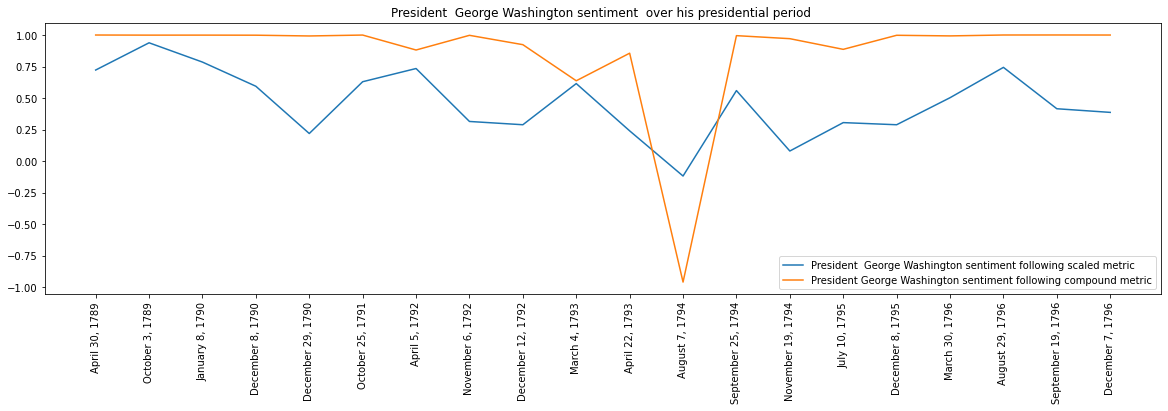

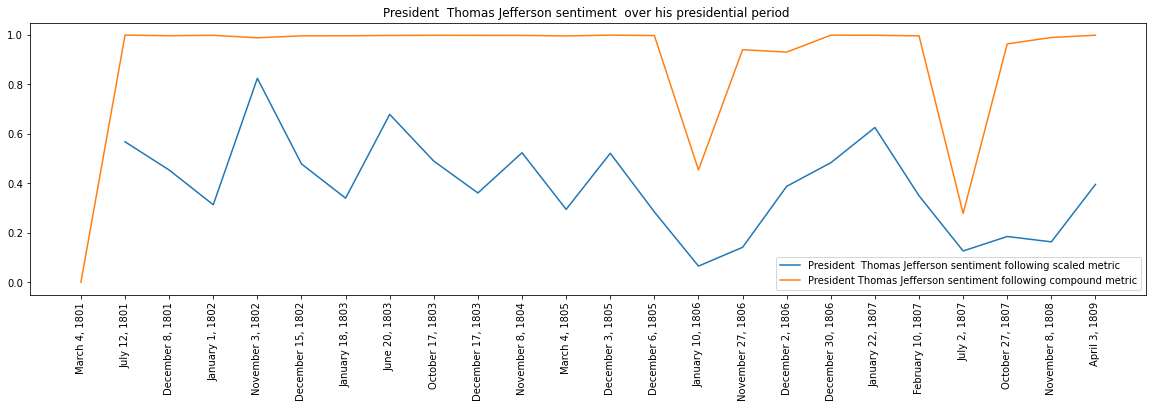

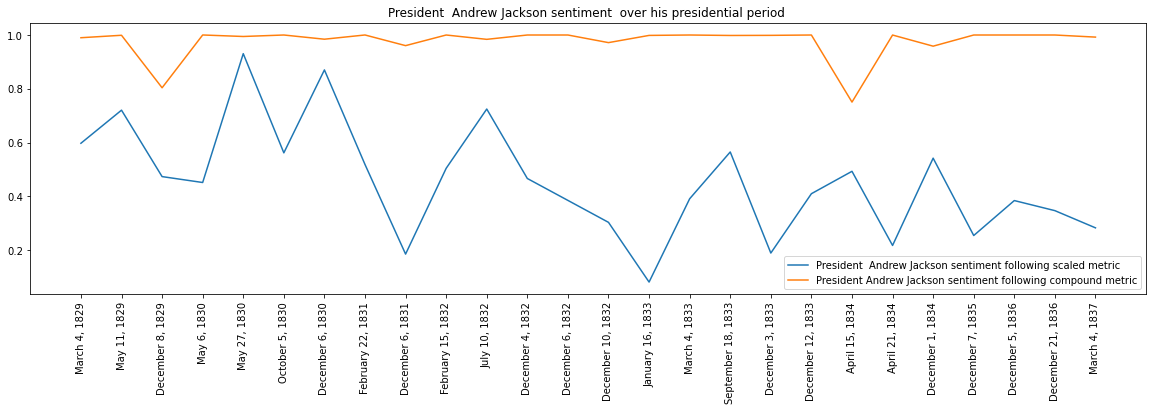

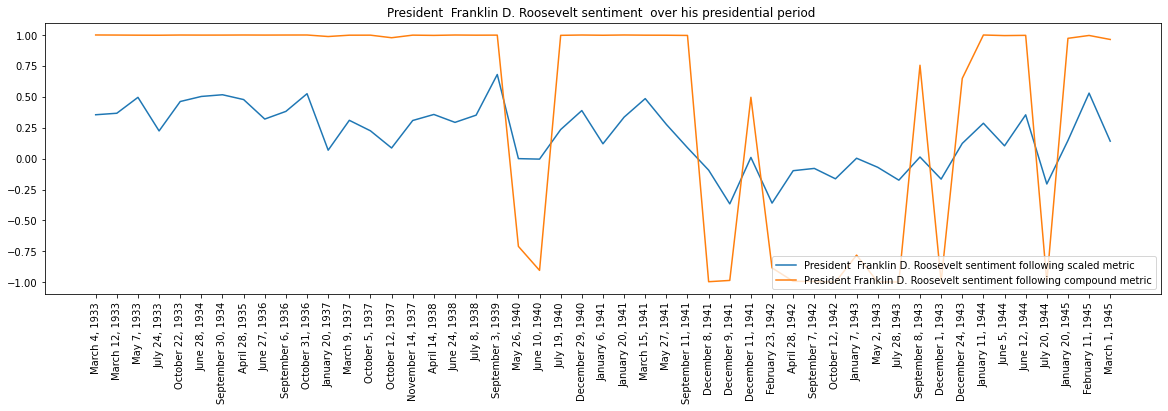

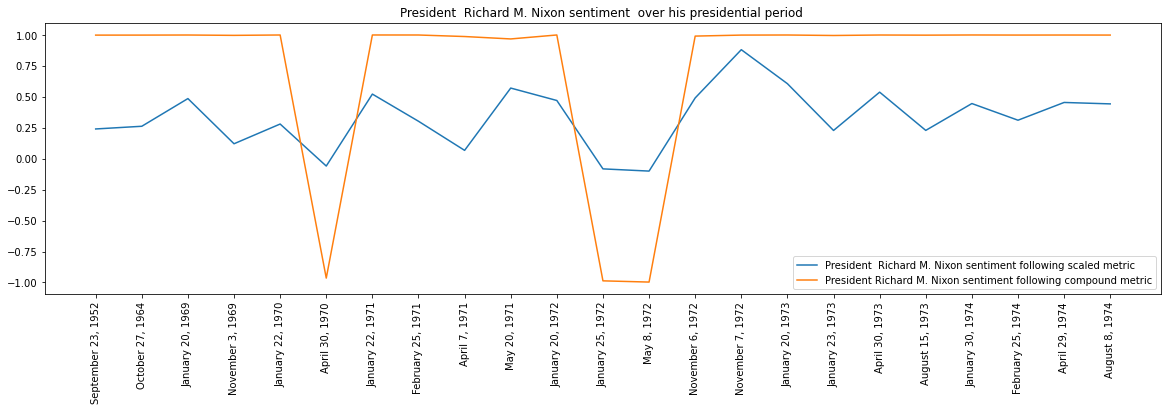

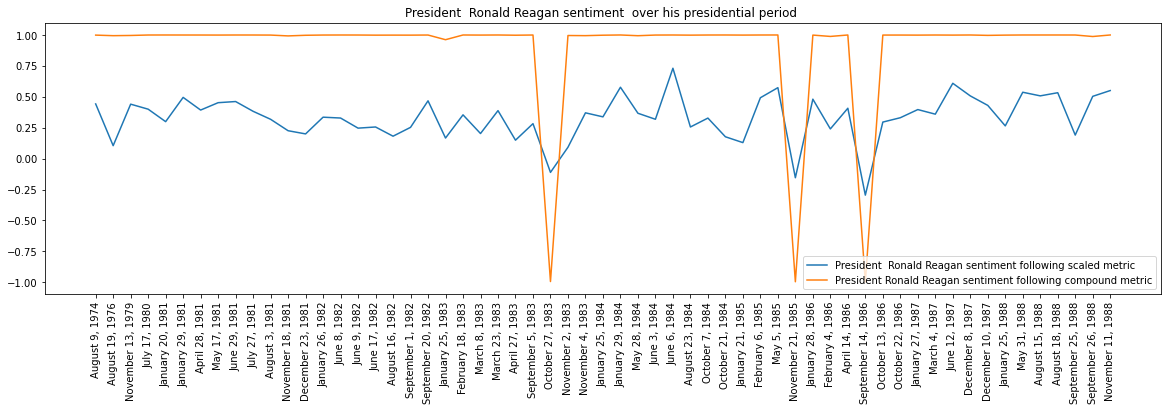

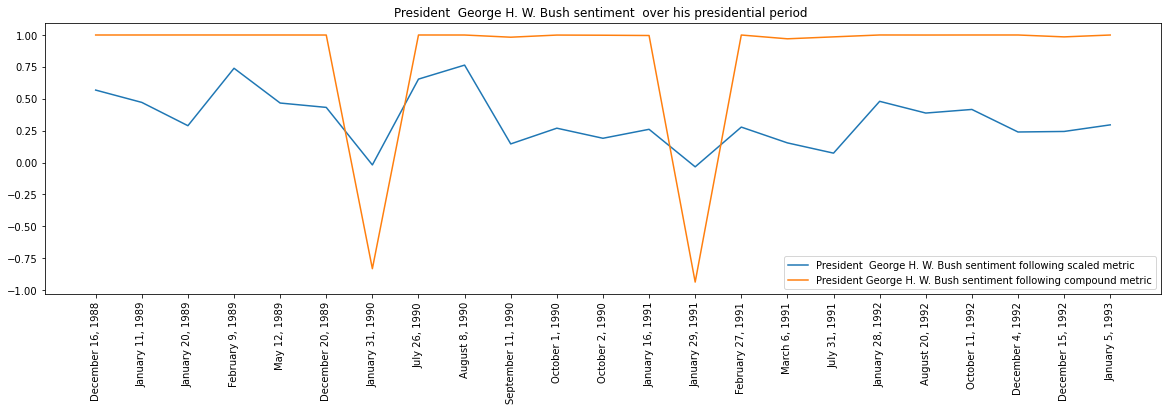

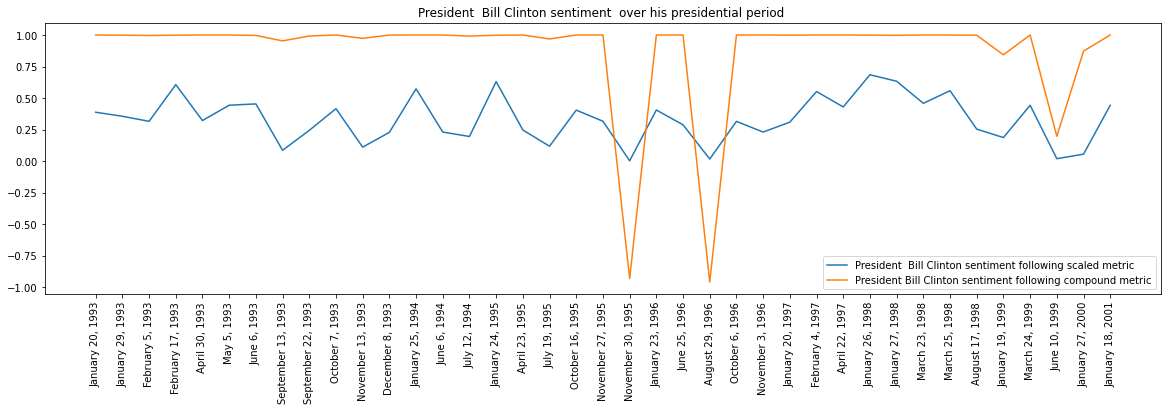

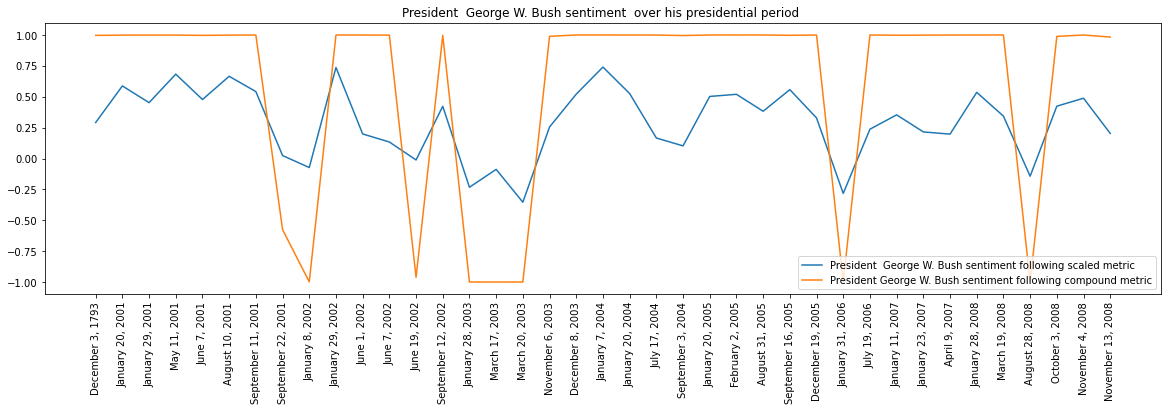

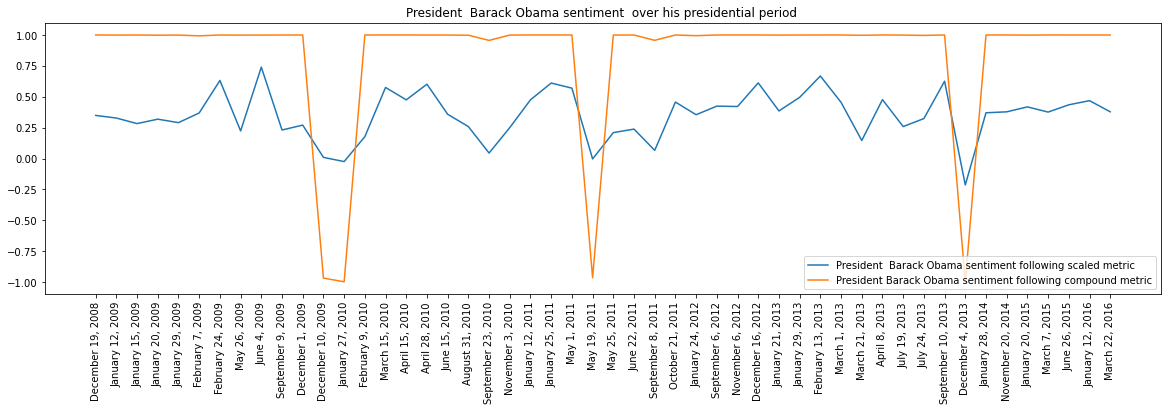

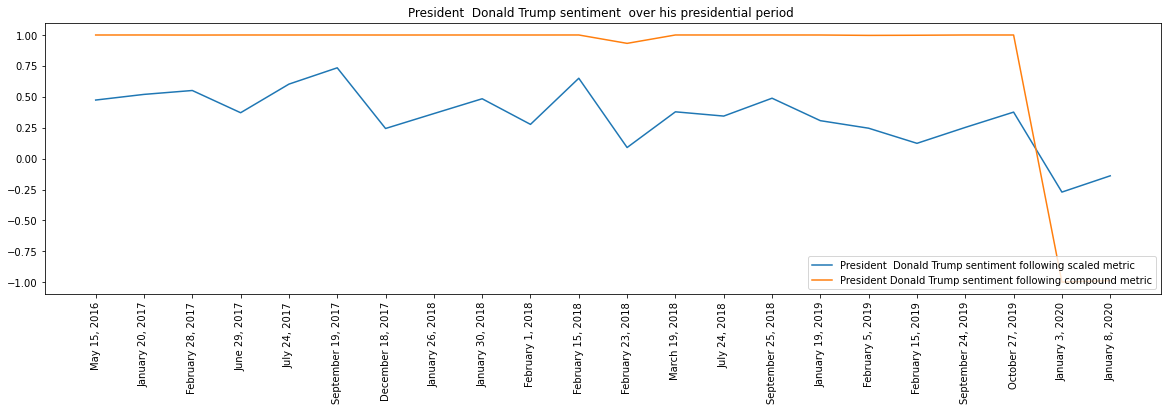

In [38]:
import matplotlib.pyplot as plt
for i in presidents_sorted:
    data_ =  df.loc[df["name"] == i]
    figu = plt.figure(figsize=(20, 5))
    axs = figu.add_subplot(111)
    axs.set_title("President  "+ i + " sentiment  over his presidential period ")
    axs.plot(data_["date of speech"],data_["overall sentiment"] )
    axs.plot(data_["date of speech"],data_["compound"] )
    axs.legend(["President  "+ i + " sentiment following scaled metric", "President " + i + " sentiment following compound metric"], loc = 'lower right')
    plt.setp(axs.xaxis.get_majorticklabels(), rotation=90)
    plt.tick_params(axis='x', which='major', labelsize=10)

## Visualizing the overall sentiments of all presidential speeches

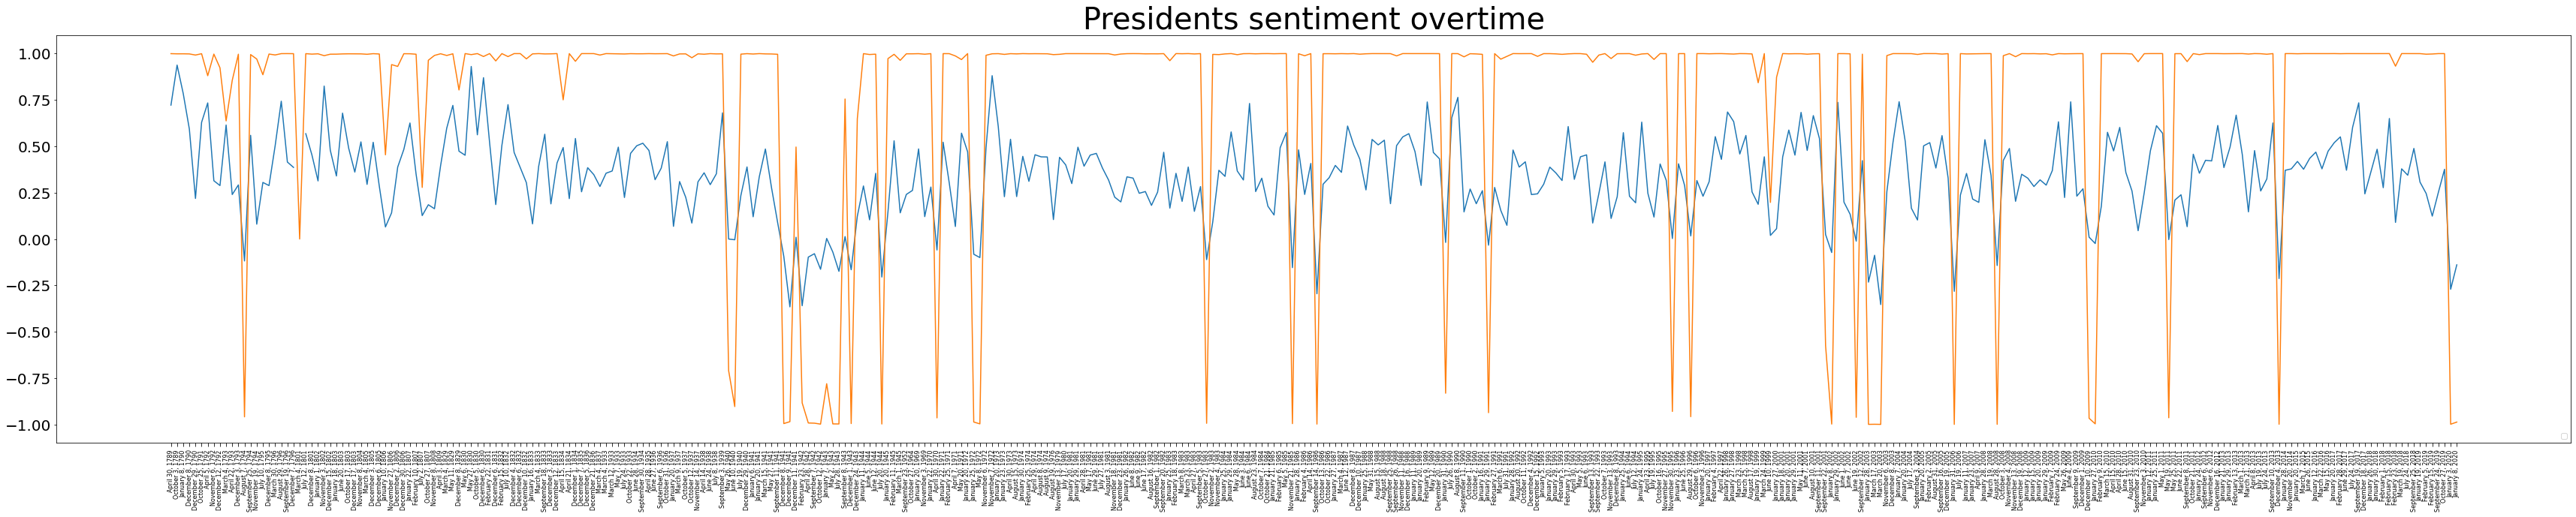

In [39]:
import matplotlib.pyplot as plt
figu = plt.figure(figsize=(60, 10))
axe = figu.add_subplot(111)
axe.legend(["Presidential sentiment following scaled metric", "Presidential sentiment following compound metric"], loc = 'lower right')
axe.tick_params(axis='x', which='major', labelsize=8, length = 5)
axe.tick_params(axis='y', which='major', labelsize=20)
plt.setp(axe.xaxis.get_majorticklabels(), rotation=90)
axe.autoscale(enable=True, axis='x')
axe.set_title("Presidents sentiment overtime", fontsize =40)
axe.plot(date,df["overall sentiment"])
axe.plot(date,df["compound"])